In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
names=["0","107","1684","1912","3437",'348',"3980","414","686","698"]
feat_file_names= ['facebook/'+x+".feat" for x in names]
featnames_filenames=['facebook/'+x+".featnames" for x in names]

In [3]:
df_list = []
for i in range(len(feat_file_names)):
    c_df = pd.read_csv(feat_file_names[i], header=None, sep=' ')
    c = pd.read_csv(featnames_filenames[i], header=None,)[0].tolist()
    c2 = []
    for j in range(len(c)):
        c2.append(' '.join(c[j].split(' ')[1:]))
    nodes = c_df[0].tolist()
    c_df = c_df.drop(columns=[0])
    c = {v: k for v, k in enumerate(c2,1)}
    c_df = c_df.rename(columns=c)
    c_df.index = nodes
    df_list.append(c_df)

In [4]:
my_nodes={}
for node in range(1,4036):
    my_nodes.setdefault(node, [])

for x in df_list:
    for node in range(1,4036):
        for i in x.index:
            if i==node:
                my_nodes[node].append(x.loc[node,])


/Users/chesterpoon/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


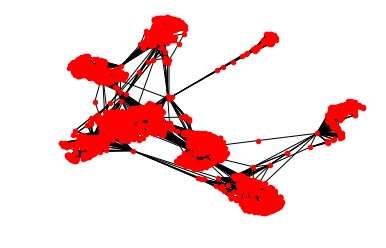

In [5]:
#Create our graph object and display
F = nx.read_edgelist('facebook_combined.txt',
                     create_using=nx.Graph(),
                     nodetype=int)

for i in range(1,len(my_nodes)+1):
    try:        
        for j in range(len(my_nodes[i][0])):
            if my_nodes[i][0].values[j]==1:
                a = ' '.join(' '.join(my_nodes[i][0].index[j].split(' ')[:-2]).split(';')[:-1])
                F.nodes[i][a] = my_nodes[i][0].index[j].split(' ')[-1]
    except:
        pass

plt.axis('off')
nx.draw_networkx(F, with_labels=False, node_size=20) 

In [6]:
dc = nx.degree_centrality(F)
bc = nx.betweenness_centrality(F)
ec = nx.eigenvector_centrality(F)

def deg_df(data,col):
    df = pd.DataFrame({k: v for k, v in sorted(data.items(),
                                      key=lambda x: x[1])}.items(), 
                                      columns=['nodes',col])
    return df

deg = deg_df(dc,'deg_centrality')
bet = deg_df(bc,'bet_centrality')
eig = deg_df(ec,'eig_centrality')


In [7]:
var1 = []
for i in range(1,len(my_nodes)+1):
    try:        
        for j in range(len(my_nodes[i][0].index)):
            var1.append(' '.join(' '.join(my_nodes[i][0].index[j].split(' ')[:-2]).split(';')[:-1]))
    except:
        pass

In [8]:
cols = pd.DataFrame(var1)[0].unique().tolist()

In [9]:
main_df = pd.merge(deg,bet,on='nodes',how='outer')
main_df = pd.merge(main_df,eig,on='nodes',how='outer')
main_df.head()

,nodes,deg_centrality,bet_centrality,eig_centrality
0,11,0.000248,0.0,2.103123e-07
1,12,0.000248,0.0,2.103123e-07
2,15,0.000248,0.0,2.103123e-07
3,18,0.000248,0.0,2.103123e-07
4,37,0.000248,0.0,2.103123e-07


In [10]:
for c in cols:
    df = pd.DataFrame(columns=['nodes',c])
    for n in range(len(F.nodes)):
        if c in F.nodes[n]:
            df1 = pd.DataFrame([[n,F.nodes[n][c]]],columns=['nodes',c])
            df = df.append(df1)
    main_df = pd.merge(main_df,df,on='nodes',how='outer')

In [11]:
main_df.head()

,nodes,deg_centrality,bet_centrality,eig_centrality,birthday,education classes id,education concentration id,education degree id,education school id,education type,...,work location id,work position id,work start_date,work with id,middle_name,work from id,work projects id,name,political,religion
0,11,0.000248,0.0,2.103123e-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,0.000248,0.0,2.103123e-07,NaN,NaN,NaN,NaN,39,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,0.000248,0.0,2.103123e-07,NaN,NaN,NaN,NaN,43,54,...,NaN,NaN,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,0.000248,0.0,2.103123e-07,NaN,NaN,NaN,22,50,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37,0.000248,0.0,2.103123e-07,NaN,NaN,NaN,NaN,NaN,55,...,NaN,193,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
main_df[main_df['nodes']==1].values

array([[1, 0.004210004952947003, 2.7832744209034606e-06,
        6.045346134948106e-07, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, '77', nan, nan, nan, '127', nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]], dtype=object)